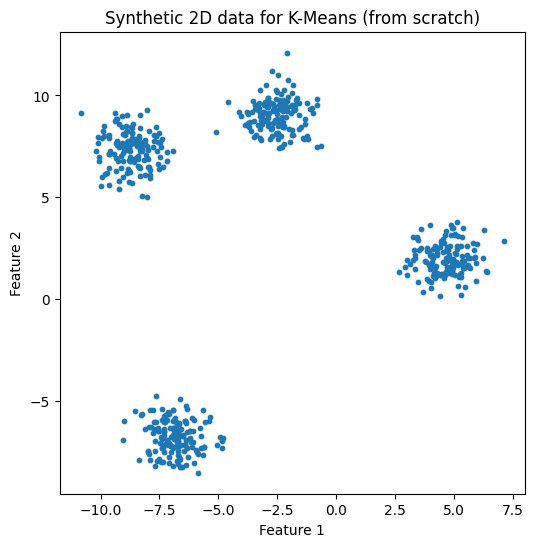

Inertia: 744.22
Silhouette score: 0.831
Davies-Bouldin score: 0.239 (lower is better)


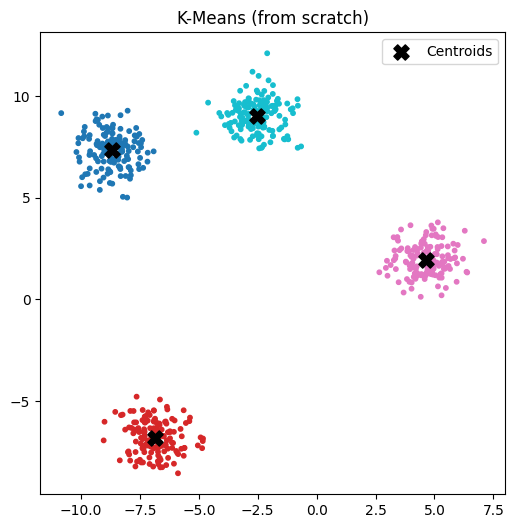

In [1]:
# ==== Cell 1: Imports ====
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, davies_bouldin_score

# for nicer plots
plt.rcParams["figure.figsize"] = (6, 6)

# ==== Cell 2: Generate toy data ====
X, y_true = make_blobs(n_samples=600, centers=4, cluster_std=0.80, random_state=42)

plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title("Synthetic 2D data for K-Means (from scratch)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# ==== Cell 3: KMeans from scratch ====
class KMeansScratch:
    def __init__(self, n_clusters=4, max_iters=100, tol=1e-4, random_state=None):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol
        self.random_state = random_state

    def _init_centroids(self, X):
        rng = np.random.RandomState(self.random_state)
        indices = rng.choice(len(X), self.n_clusters, replace=False)
        return X[indices]

    def _compute_distances(self, X, centroids):
        # shape: (n_samples, n_clusters)
        return np.linalg.norm(X[:, None, :] - centroids[None, :, :], axis=2)

    def fit(self, X):
        X = np.array(X)
        self.centroids_ = self._init_centroids(X)

        for i in range(self.max_iters):
            distances = self._compute_distances(X, self.centroids_)
            labels = np.argmin(distances, axis=1)

            new_centroids = np.array(
                [X[labels == k].mean(axis=0) for k in range(self.n_clusters)]
            )

            # handle empty clusters
            for k in range(self.n_clusters):
                if np.isnan(new_centroids[k]).any():
                    new_centroids[k] = self.centroids_[k]

            shift = np.linalg.norm(self.centroids_ - new_centroids)
            self.centroids_ = new_centroids

            if shift < self.tol:
                break

        self.labels_ = labels
        self.inertia_ = np.sum(
            np.min(self._compute_distances(X, self.centroids_) ** 2, axis=1)
        )
        return self

    def predict(self, X):
        distances = self._compute_distances(X, self.centroids_)
        return np.argmin(distances, axis=1)

# ==== Cell 4: Train and evaluate ====
kmeans = KMeansScratch(n_clusters=4, max_iters=200, random_state=42)
kmeans.fit(X)

sil = silhouette_score(X, kmeans.labels_)
db  = davies_bouldin_score(X, kmeans.labels_)

print(f"Inertia: {kmeans.inertia_:.2f}")
print(f"Silhouette score: {sil:.3f}")
print(f"Davies-Bouldin score: {db:.3f} (lower is better)")

# ==== Cell 5: Plot clustering result ====
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap="tab10", s=10)
plt.scatter(
    kmeans.centroids_[:, 0],
    kmeans.centroids_[:, 1],
    c="black",
    s=120,
    marker="X",
    label="Centroids",
)
plt.title("K-Means (from scratch)")
plt.legend()
plt.show()
